In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = '4Hz_8Hz_pt2_20ssaturation_spiking'

# extra step to make a new file with the same name only with 'SimParams.mat' added
#simparameter=list(namenoise)
#simparameter.append('_SimParams.mat')
#simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[0.2,0.2    # offset in nA
                                               ,0.0,0.0 # amplitude in nA
                                               ,2,20   # frequency in Hz
                                              ],10000,20000,
                                       namenoise)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
#                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
#                                              20, 2, 2, 20, 2]         # frequency in Hz
#                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')


Noise input is of type double sine
Data is saved


In [3]:
SimParams = {}
######################## Save
SimParams['saving'] = 'yes' #'yes','no'
######################## plot
SimParams['plotting'] = 'yes' #'yes','no'
######################## Experiment length
SimParams['dt'] = 0.025*ms
SimParams['exp_runtime'] = asarray(size(Noise_t)*SimParams['dt'])
#print(type(SimParams['exp_runtime']*second))
######################## Neuronal responses to run. 
SimParams['IO_response']='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams['N_Cells_PC'] = 10
SimParams['N_Cells_DCN'] = 20
SimParams['N_Cells_IO'] = 20
name = namenoise+'SimParam.pickle'
print(SimParams)
######################## Saving SimParams
with open(name, 'wb') as sims:
    pickle.dump(SimParams,sims, pickle.HIGHEST_PROTOCOL)
#sio.savemat('SimParams.mat', mdict={'SimParams': SimParams})


{'saving': 'yes', 'plotting': 'yes', 'dt': 25. * usecond, 'exp_runtime': array(20.), 'IO_response': 'both', 'N_Cells_PC': 10, 'N_Cells_DCN': 20, 'N_Cells_IO': 20}


In [4]:
#from E_Synapses_NoPlasticity import *
from E_New_Plasticity import *
#visualise(S_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTD

loading went fine
intrinsic current coupled = <PC_Coupled_STDP.I_intrinsic: array([1.98, 1.94, 2.06, 2.02, 1.92, 2.04, 1.9 , 2.  , 2.08, 1.96]) * namp>
intrinsic current uncoupled = <PC_Uncoupled_STDP.I_intrinsic: array([1.98, 1.94, 2.06, 2.02, 1.92, 2.04, 1.9 , 2.  , 2.08, 1.96]) * namp>
t_learn = 5
number of IO 20
nr of noise is 2
offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]


WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


<dummy_Coupled.weight: array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9, 1. , 0.9,
       0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2])>
new weights <dummy_Coupled.weight: array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])>
offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]


In [5]:
# run pt1
run(exp_runtime,report='text')

Starting simulation at t=0. s for a duration of 20. s
141.45 ms (0%) simulated in 10s, estimated 23m 25s remaining.
279.325 ms (1%) simulated in 20s, estimated 23m 33s remaining.
0.415675 s (2%) simulated in 30s, estimated 23m 34s remaining.
0.5494 s (2%) simulated in 40s, estimated 23m 37s remaining.
0.689025 s (3%) simulated in 50s, estimated 23m 22s remaining.
0.827025 s (4%) simulated in 1m 0s, estimated 23m 12s remaining.
0.95705 s (4%) simulated in 1m 10s, estimated 23m 14s remaining.
1.03955 s (5%) simulated in 1m 20s, estimated 24m 20s remaining.
1.096025 s (5%) simulated in 1m 30s, estimated 25m 54s remaining.
1.154025 s (5%) simulated in 1m 40s, estimated 27m 15s remaining.
1.214325 s (6%) simulated in 1m 50s, estimated 28m 24s remaining.
1.270025 s (6%) simulated in 2m 0s, estimated 29m 33s remaining.
1.329025 s (6%) simulated in 2m 10s, estimated 30m 30s remaining.
1.38845 s (6%) simulated in 2m 20s, estimated 31m 20s remaining.
1.442025 s (7%) simulated in 2m 30s, estimate

8.2992 s (41%) simulated in 42m 42s, estimated 1h 0m 12s remaining.
8.354025 s (41%) simulated in 42m 52s, estimated 59m 46s remaining.
8.405025 s (42%) simulated in 43m 2s, estimated 59m 22s remaining.
8.463025 s (42%) simulated in 43m 12s, estimated 58m 54s remaining.
8.519025 s (42%) simulated in 43m 22s, estimated 58m 27s remaining.
8.570025 s (42%) simulated in 43m 32s, estimated 58m 4s remaining.
8.627025 s (43%) simulated in 43m 42s, estimated 57m 37s remaining.
8.681725 s (43%) simulated in 43m 52s, estimated 57m 12s remaining.
8.737025 s (43%) simulated in 44m 2s, estimated 56m 46s remaining.
8.795025 s (43%) simulated in 44m 12s, estimated 56m 19s remaining.
8.849025 s (44%) simulated in 44m 22s, estimated 55m 55s remaining.
8.904325 s (44%) simulated in 44m 32s, estimated 55m 30s remaining.
8.963 s (44%) simulated in 44m 42s, estimated 55m 3s remaining.
9.016225 s (45%) simulated in 44m 52s, estimated 54m 40s remaining.
9.072025 s (45%) simulated in 45m 2s, estimated 54m 16s

14.87865 s (74%) simulated in 1h 2m 47s, estimated 21m 37s remaining.
14.934025 s (74%) simulated in 1h 2m 57s, estimated 21m 21s remaining.
14.990025 s (74%) simulated in 1h 3m 7s, estimated 21m 6s remaining.
15.040025 s (75%) simulated in 1h 3m 17s, estimated 20m 52s remaining.
15.095025 s (75%) simulated in 1h 3m 27s, estimated 20m 37s remaining.
15.1478 s (75%) simulated in 1h 3m 37s, estimated 20m 23s remaining.
15.197025 s (75%) simulated in 1h 3m 47s, estimated 20m 10s remaining.
15.252475 s (76%) simulated in 1h 3m 57s, estimated 19m 54s remaining.
15.305025 s (76%) simulated in 1h 4m 7s, estimated 19m 40s remaining.
15.362025 s (76%) simulated in 1h 4m 17s, estimated 19m 25s remaining.
15.418025 s (77%) simulated in 1h 4m 27s, estimated 19m 9s remaining.
15.467025 s (77%) simulated in 1h 4m 37s, estimated 18m 56s remaining.
15.524225 s (77%) simulated in 1h 4m 47s, estimated 18m 41s remaining.
15.5797 s (77%) simulated in 1h 4m 57s, estimated 18m 26s remaining.
15.631025 s (78

['frequency =2', 'frequency =20']


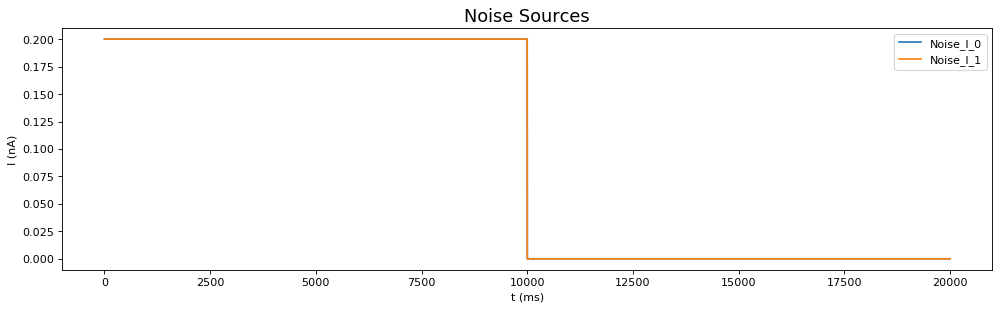

Plasticity


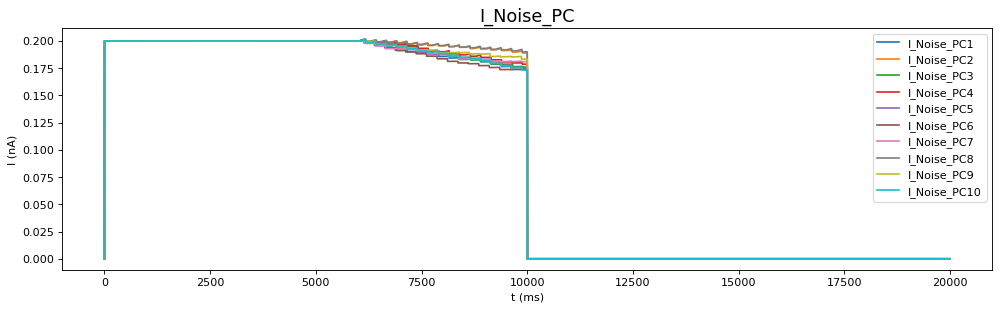

Plasticity Coupled Scenario


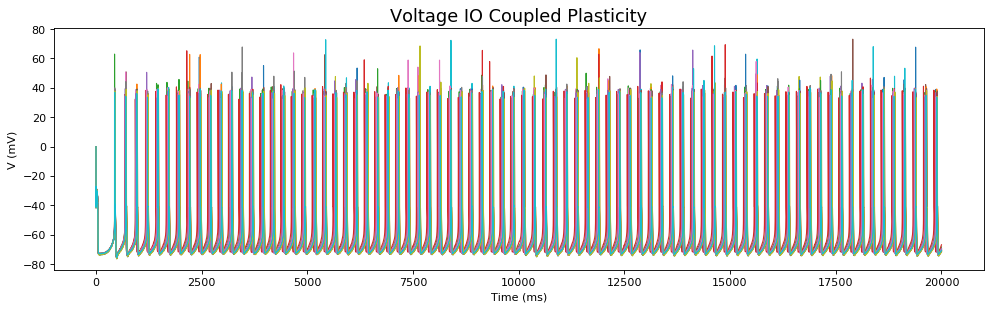

Number of spikes DCN: 707
Number of spikes DCN: 849
Number of spikes DCN: 682
Number of spikes DCN: 773
Number of spikes DCN: 689
Number of spikes DCN: 718
Number of spikes DCN: 814
Number of spikes DCN: 860
Number of spikes DCN: 659
Number of spikes DCN: 765


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


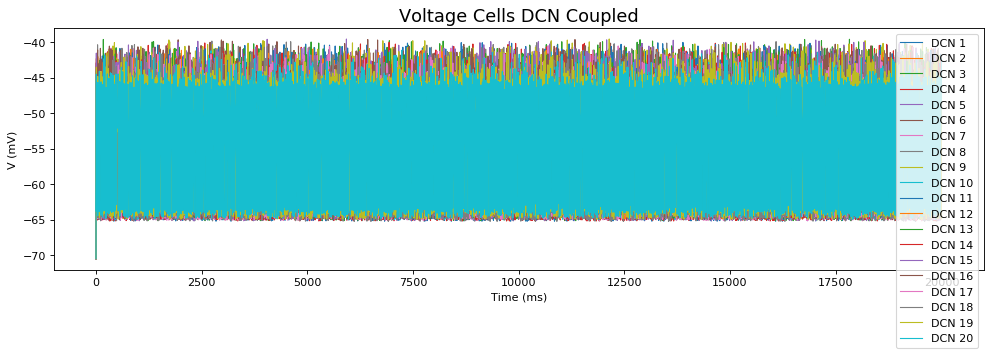

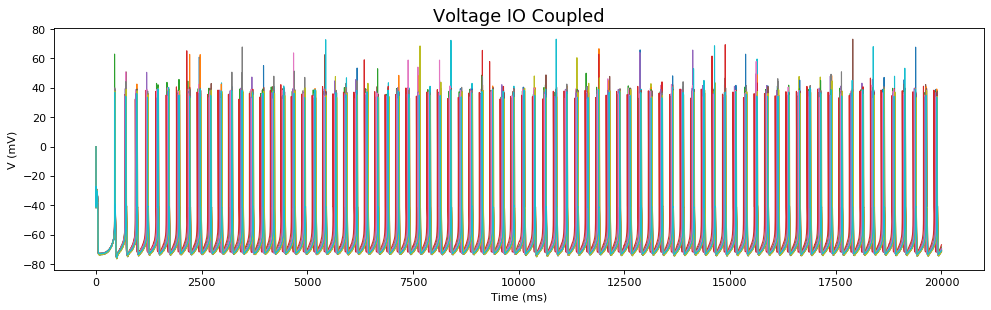

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


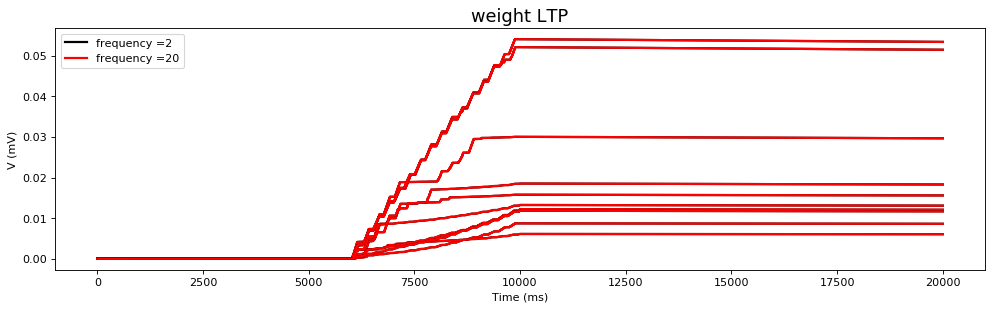

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


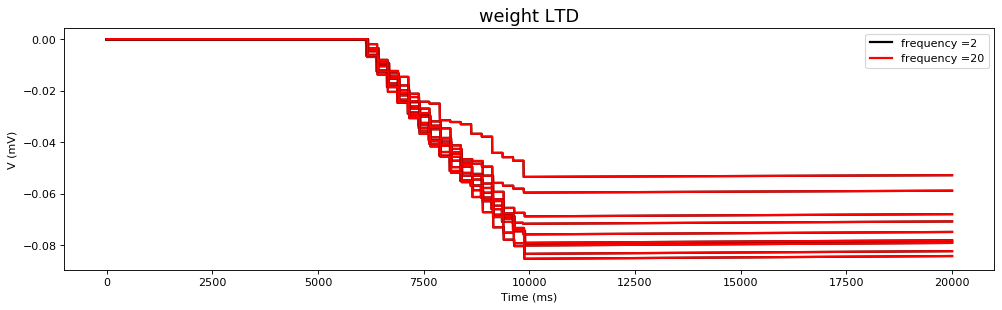

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


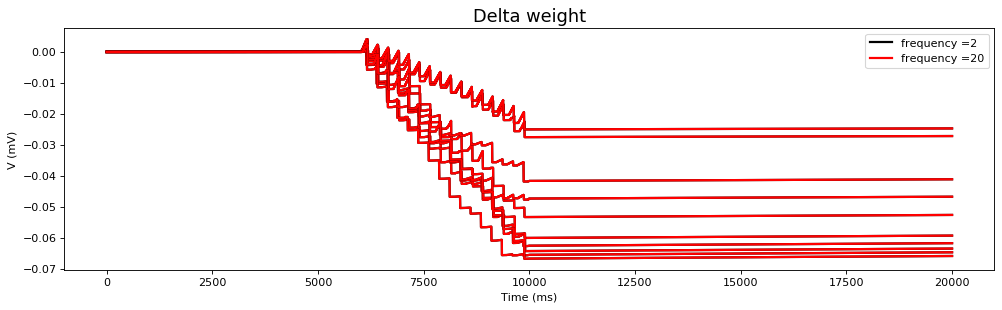

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


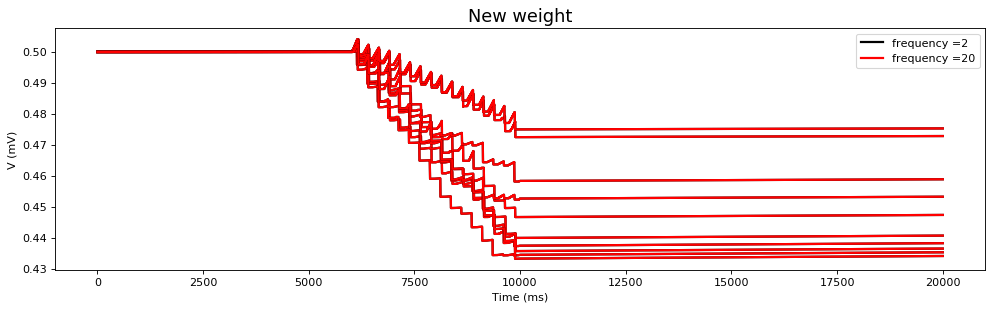

Plasticity Uncoupled Scenario


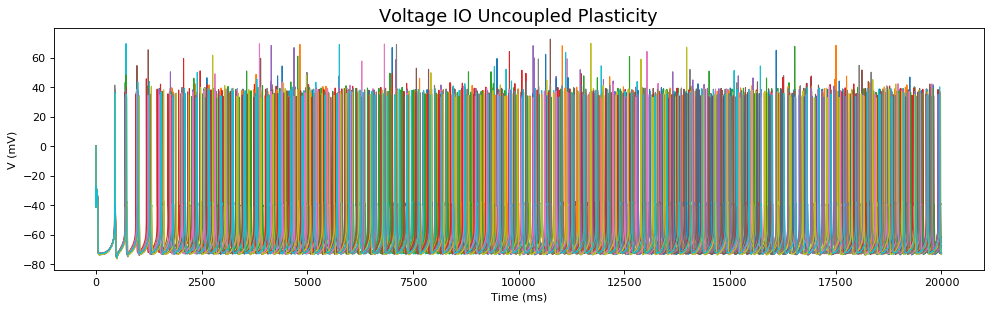

Number of spikes DCN: 670
Number of spikes DCN: 789
Number of spikes DCN: 648
Number of spikes DCN: 697
Number of spikes DCN: 657
Number of spikes DCN: 665
Number of spikes DCN: 762
Number of spikes DCN: 731
Number of spikes DCN: 637
Number of spikes DCN: 700


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


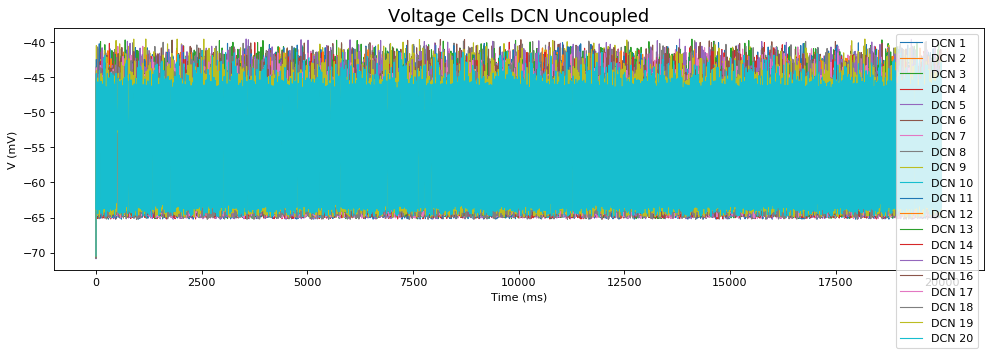

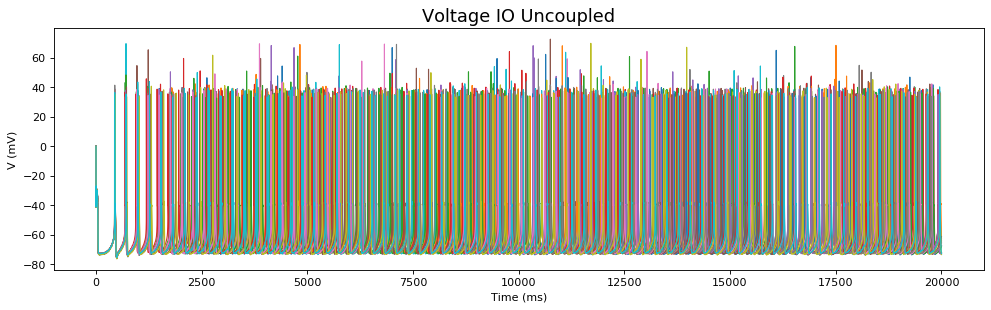

<Figure size 1200x320 with 0 Axes>

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


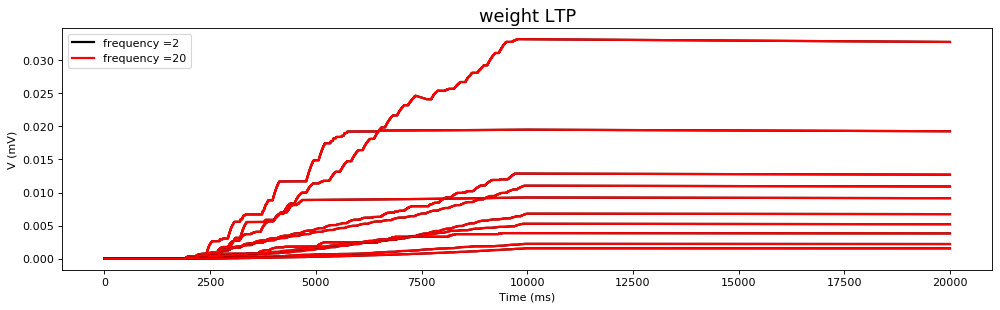

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


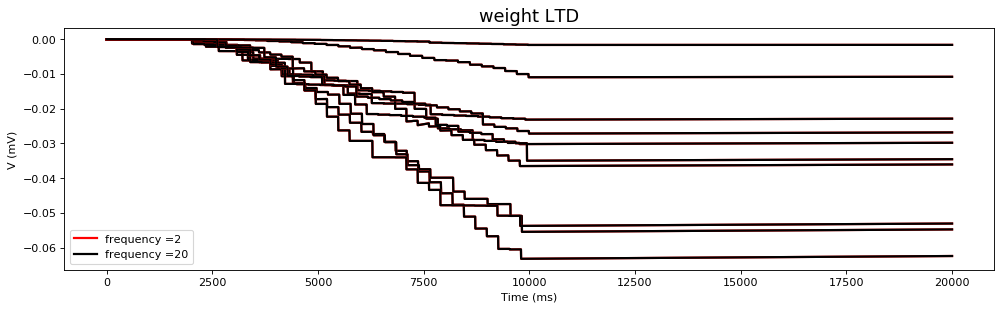

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


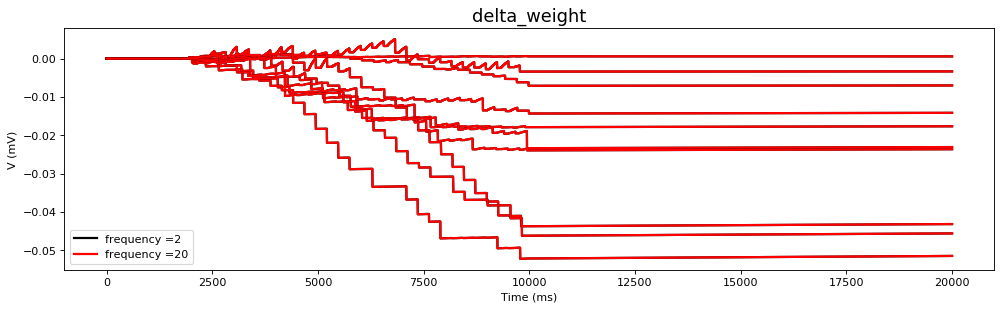

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


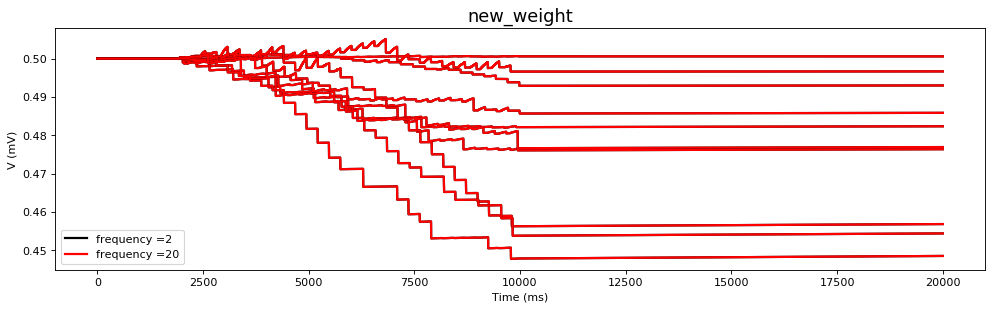

In [6]:
from G_Plot_Plasticity import *

In [7]:
#from F_save_data_Plasticity import *

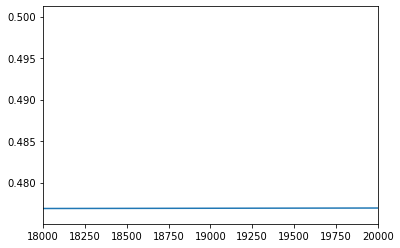

In [8]:
plt.figure()
plt.plot(mon_N_PC_Uncoupled.new_weight[1])
plt.xlim([18000,20000])
plt.show()

In [9]:
from F_save_data_Plasticity import *

Plasticity variables are saved
Inputs are saved
Voltage Cells are saved
Spike Times are saved
population rates saved


In [10]:
%matplotlib notebook
#print(y)
y_post = np.append(np.zeros(1000),np.ones(19000))
print(y_post)
print(mon_N_PC_Uncoupled.w_IO_uncoupled)
x=np.linspace(0,len(y_post),len(y_post))
print(x)
plt.subplots(3,1)
#plt.title('distribution uncoupled')

for k in range(1,2):
    x=mon_N_PC_Coupled.freq_dep_PC[k]
    x2 = mon_N_PC_Coupled.freq_dep_IO[k]
    ax= plt.subplot(211)
    plt.plot(x)
    plt.plot(x2)
    plt.subplot(212,sharex=ax)
    plt.plot(mon_N_PC_Coupled.f_lt_PC_coupled[k],color='red')

    plt.plot(mon_N_PC_Coupled.f_st_PC_coupled[k],color='black')
    #plt.ylim([100,120])
    #plt.xlim([5000,10000])
    
    
print(sum(mon_N_PC_Coupled.freq_dep_PC[0][5000:10000]))
print(sum(mon_N_PC_Coupled.freq_dep_IO[0][5000:10000]))
#plt.xlim([0,30000])    
#plt.legend(['w io coupled', 'w pc coupled'])
plt.show()
print('mean x',np.nanmean(x))
print('std x',np.nanstd(x))
plt.figure()
#plt.title('distribution uncoupled')
for k in range(1,20):

    plt.plot(mon_N_PC_Coupled.tau[k],color='green')
    plt.plot(mon_N_PC_Uncoupled.tau[k],color='red')
    
    #plt.plot(mon_N_PC_Uncoupled.w_PC_uncoupled[k],color='blue')
plt.legend(['w pc unc', 'w io unc'])
plt.show()

#plt.title('distribution uncoupled')
plt.figure()
for k in range(0,20):
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    #plt.plot(mon_N_PC_Coupled.freq_dep[k],color='red')
    #plt.plot(mon_N_PC_Coupled.weight_IO[k],color='black')
    #plt.plot(mon_N_PC_Coupled.weight_PC[k],color='red')
    plt.plot(mon_N_PC_Uncoupled.max_LTD_IO_uncoupled[k],color='red')

    plt.plot(mon_N_PC_Coupled.max_LTD_IO_coupled[k],color='green')

#plt.legend(['long term', 'short term'])
plt.figure()
plt.plot(mon_N_PC_Coupled.weight_IO[k],color='black')
plt.plot(mon_N_PC_Coupled.weight_PC[k],color='red')
plt.show()



[0. 0. 0. ... 1. 1. 1.]
[[0.5        0.5        0.5        ... 0.99999999 0.99999999 0.99999999]
 [0.5        0.5        0.5        ... 0.99999983 0.99999983 0.99999983]
 [0.5        0.5        0.5        ... 1.         1.         1.        ]
 ...
 [0.5        0.5        0.5        ... 0.99999972 0.99999972 0.99999972]
 [0.5        0.5        0.5        ... 0.99999308 0.99999308 0.99999308]
 [0.5        0.5        0.5        ... 0.99999992 0.99999992 0.99999992]]
[0.00000000e+00 1.00005000e+00 2.00010001e+00 ... 1.99979999e+04
 1.99989999e+04 2.00000000e+04]


<IPython.core.display.Javascript object>

707.492647094473
3308.6733329908147
mean x 0.39814801396680544
std x 0.3982331776658201


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
from F_save_data_Plasticity import *

In [12]:
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.f_lt_PC_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.mean_freq_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.mean_freq_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.max_LTD_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.max_LTD_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('PC moving average')
for k in range(0,1):
    plt.plot(mon_N_PC_Coupled.y[k],color='red')
    #plt.plot(mon_N_PC_Coupled.f_st_PC[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('IO moving average')
for p in range(0,n_IO):
    plt.plot(mon_N_PC_Coupled.f_lt_IO[p],color='red')
    plt.plot(mon_N_PC_Coupled.f_st_IO[p], color='black')
plt.legend(['long term','short term'])
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')

plt.figure()
plt.title('Difference in moving average IO (short term - long term)')
#for p in range(0,n_IO):
#    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]
#    idxio = (difio>0).astype(float)
#    procentage_LTD = sum(idxio)/1000
#    print('depression %',procentage_LTD)
#    plt.plot(mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p])
#plt.figure()
for p in range(0,10):
    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]

    dif=mon_N_PC_Coupled.f_st_PC[p]-mon_N_PC_Coupled.f_lt_PC[p]
    idx = (dif>0).astype(float)
    #plt.plot(idx)
    #plt.ylim([0,1.1])
    procentage_LTP = sum(idx)/1000
    plt.plot(dif)
    plt.plot(difio)
    print('potentiated %',procentage_LTP)
print(mon_N_PC_Coupled.f_lt_IO.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: No attribute with name mean_freq_IO_uncoupled

In [ ]:
print(np.floor(-0.1))

In [ ]:
neuron = 0
ex = 2000
wpc = mon_N_PC_Coupled.weight_PC[neuron]
wio = mon_N_PC_Coupled.weight_IO[neuron]
maxDelay = 100
gr = (1-1/(1+exp(-ex*(wpc+np.abs(wio)-0.3*0.5))))
prop= (np.abs(wio)/(np.abs(wio)+wpc))
prop2=(np.abs(wpc)/(np.abs(wio)+wpc))
tauIO = maxDelay*(np.abs(wio)/(np.abs(wio)+wpc))*gr
tauPC = maxDelay*(np.abs(wpc)/(np.abs(wio)+wpc))*gr

fig, axs = plt.subplots(4,1, figsize=(10,20))

ax1 = plt.subplot(4,1,1)
plt.plot(tauPC)
plt.plot(tauIO)

ax2 = plt.subplot(4,1,2)
plt.plot(wpc)
plt.plot(wio)

ax3 = plt.subplot(4,1,3)
plt.plot(prop2)
plt.plot(prop)
plt.show()

In [ ]:
x= np.linspace(0,20,10000)
sin1 = np.sin(x)
sin2 = np.sin(x*3)
neu = [2.5,5,14,18]
yPC = np.ones(len(neu))

f, a =plt.subplots(2,1, figsize=(20,15))
ax=plt.subplot(211)
plt.plot(x,sin1,linewidth=4)
for k in neu:
    plt.axvline(x=k,color='r',linestyle='--')
plt.ylabel('Input current [nA]')
plt.subplot(212,sharex=ax)
plt.scatter(x=neu,y=yPC,marker='|', color='black',s=1000)
plt.xlabel('time [s]')
#plt.xlim([0,20])
plt.show()
plt.figure()
plt.plot(x,sin2,linewidth=3)
plt.show()